In [1]:
from sklearn.datasets import load_breast_cancer        # 분류형 데이터
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier        # 분류형 모델

In [2]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
data.data.shape

(569, 30)

In [5]:
data.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [6]:
data.target.shape

(569,)

In [8]:
data.target[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1])

In [9]:
data.feature_names

# 평균값, 표준편차, 최악의 상태로 구분되어있는 데이터

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
data.target_names

# 악성, 양성

array(['malignant', 'benign'], dtype='<U9')

In [11]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### estimator

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# test_size가 생략되면 학습데이터와 테스트데이터가 3:1의 비율로 자동 생성
# 모델을 테스트할때 동일한 값으로 테스트하는 것이 좋으므로 적당한 시드값을 부여하는 것이 좋다.

((426, 30), (143, 30), (426,), (143,))

In [16]:
model = DecisionTreeClassifier(criterion='entropy')   # 의사결정트리 관련 모델 => estimator를 만들어주는 과정
model

# criterion='entropy'
# 테스트 데이터를 넣었을때 정확도가 높을 수 있는 파라미터를 넣어주는 것이 중요하다.
# GridSearchCV가 이런 파라미터를 찾을 수 있게 도와주는 함수 => 내부적으로 KFold 함수 사용

DecisionTreeClassifier(criterion='entropy')

### fit

In [19]:
model.fit(X_train, y_train)

# 지도학습과 비지도학습은 레이블(정답)이 있냐 없냐의 차이
# 의사결정트리는 지도학습 모델이기때문에 파라미터로 학습데이터와 정답데이터를 전달해주면 된다.

DecisionTreeClassifier(criterion='entropy')

### predict

In [24]:
y_pred = model.predict(X_test)
y_pred

# 정답을 통해 분류를 어떻게 할지 정해져 있는 상태이므로 테스트 값을 넣어주면 확인 가능

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [23]:
y_test

# 테스트 정답을 넣어주면 테스트 데이터가 얼마나 맞는지 확인할 수 있다.
# 정확도에 대한 함수는 별도로 존재

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

<h3 style="color:#ff6600; font-size:1.1em">-- 예측결과 정확도 함수 ✨</h3>

In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

# 분류형 모델에서만 사용 가능
# (분류형모델과 예측모델은 정확도를 계산하는 방식이 다르기 때문 / r2_score() 함수로 결정 계수 사용)

0.951048951048951

In [26]:
model.score(X_train, y_train)

# model.score(): 정확도(accuracy) 계산
# 모델이 가지고 있는 score()함수로 학습데이터와 정답데이터를 전달해주면 정확도를 구할 수 있다.

1.0

### transform

In [27]:
from sklearn.preprocessing import StandardScaler

print(X_train)

[[1.289e+01 1.312e+01 8.189e+01 ... 5.366e-02 2.309e-01 6.915e-02]
 [1.340e+01 2.052e+01 8.864e+01 ... 2.051e-01 3.585e-01 1.109e-01]
 [1.296e+01 1.829e+01 8.418e+01 ... 6.608e-02 3.207e-01 7.247e-02]
 ...
 [1.429e+01 1.682e+01 9.030e+01 ... 3.333e-02 2.458e-01 6.120e-02]
 [1.398e+01 1.962e+01 9.112e+01 ... 1.827e-01 3.179e-01 1.055e-01]
 [1.218e+01 2.052e+01 7.722e+01 ... 7.431e-02 2.694e-01 6.878e-02]]


In [28]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
print(X_train)

# StandardScaler(): 평균0, 표준편차가 1이되도록 값을 재조정 하는 작업

[[-0.34913849 -1.43851335 -0.41172595 ... -0.91671059 -0.92508585
  -0.80841115]
 [-0.20468665  0.31264011 -0.13367256 ...  1.43655962  1.14955889
   1.56911143]
 [-0.32931176 -0.21507235 -0.31739376 ... -0.7237126   0.53496977
  -0.61934827]
 ...
 [ 0.04739597 -0.56293662 -0.06529202 ... -1.23262438 -0.68282718
  -1.261137  ]
 [-0.04040808  0.09966199 -0.03151368 ...  1.08847951  0.48944465
   1.26159953]
 [-0.5502381   0.31264011 -0.6040977  ... -0.59582424 -0.29911546
  -0.82948141]]


In [30]:
print(X_test)

[[1.247e+01 1.860e+01 8.109e+01 ... 1.015e-01 3.014e-01 8.750e-02]
 [1.894e+01 2.131e+01 1.236e+02 ... 1.789e-01 2.551e-01 6.589e-02]
 [1.546e+01 1.948e+01 1.017e+02 ... 1.514e-01 2.837e-01 8.019e-02]
 ...
 [1.104e+01 1.683e+01 7.092e+01 ... 7.431e-02 2.998e-01 7.881e-02]
 [1.981e+01 2.215e+01 1.300e+02 ... 2.388e-01 2.768e-01 7.615e-02]
 [1.026e+01 1.222e+01 6.575e+01 ... 6.696e-02 2.937e-01 7.722e-02]]


In [31]:
X_test = scaler.fit_transform(X_test)
print(X_test)

[[-0.47853809 -0.21371678 -0.45835473 ... -0.27372978  0.07289581
   0.09152022]
 [ 1.37424404  0.38950001  1.29239853 ...  0.84579664 -0.67110896
  -1.02766663]
 [ 0.37769352 -0.01783827  0.3904579  ...  0.44803208 -0.21152934
  -0.28706636]
 ...
 [-0.88804017 -0.60769971 -0.87720113 ... -0.66701045  0.04718507
  -0.35853687]
 [ 1.62338166  0.57647495  1.55597935 ...  1.71220016 -0.32240694
  -0.49629888]
 [-1.11140494 -1.63383602 -1.09012501 ... -0.77332207 -0.05083716
  -0.44088334]]


## Iris 데이터셋으로 기계학습

// 1. 데이터 불러오기

In [32]:
from sklearn.datasets import load_iris

data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

// 2. 데이터 확인하기

In [33]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

// 3. 전처리 작업

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [35]:
iris = pd.DataFrame(data=data.data, columns=data.feature_names)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [36]:
target = pd.Series(data.target, dtype="category")
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: category
Categories (3, int64): [0, 1, 2]

In [37]:
target = target.cat.rename_categories(data.target_names)
target

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [38]:
iris['species'] = target
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [39]:
iris.rename({"sepal length (cm)": "sepal_length", "sepal width (cm)": "sepal_width", "petal length (cm)": "petal_length", "petal width (cm)": "petal_width"}, axis=1, inplace=True)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [40]:
iris.isna().sum(axis=0)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [41]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [42]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [52]:
iris.describe(include="all")

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [43]:
iris.corr()

# 수치 데이터 상관관계 확인
# 분류모델에서는 컬럼들의 상관관계가 중요하지않으므로 사용하지 않아도 됨

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [44]:
iris.groupby("species").size()

# 품종별 데이터 개수 구하기

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [53]:
iris.groupby("species").mean()

# 품종별 데이터 평균 구하기

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


// 4. 데이터 시각화

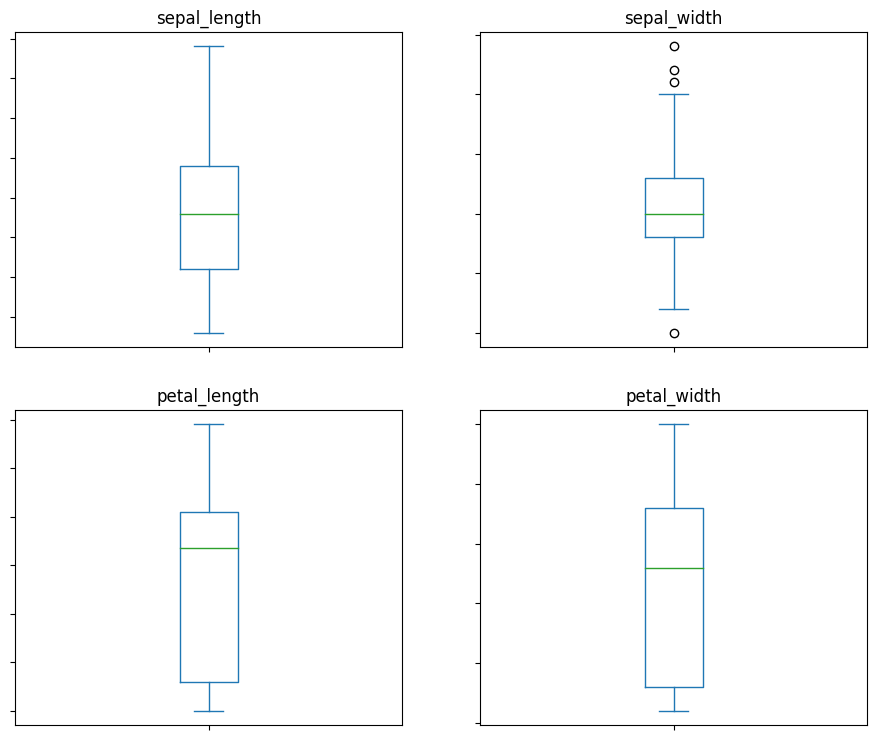

In [60]:
def boxplot_iris(feature_names, dataset):
    i = 1
    plt.figure(figsize=(11, 9))
    
    for col in feature_names:
        # feature_names에 4개 컬럼 전달
        plt.subplot(2, 2, i)
        # 2행 2열 구조에 i로 위치 지정
        plt.axis('on')
        plt.tick_params(axis="both", left=True, top=False, right=False, bottom=True, labelleft=False, labeltop=False, labelright=False, labelbottom=False)
        dataset[col].plot(kind="box", subplots=True, sharex=False, sharey=True)
        plt.title(col)
        i += 1
        
    plt.show()
    
boxplot_iris(iris.columns[:-1], iris)

# left=True, top=False, right=False, bottom=True: True인 곳에 라벨 표시

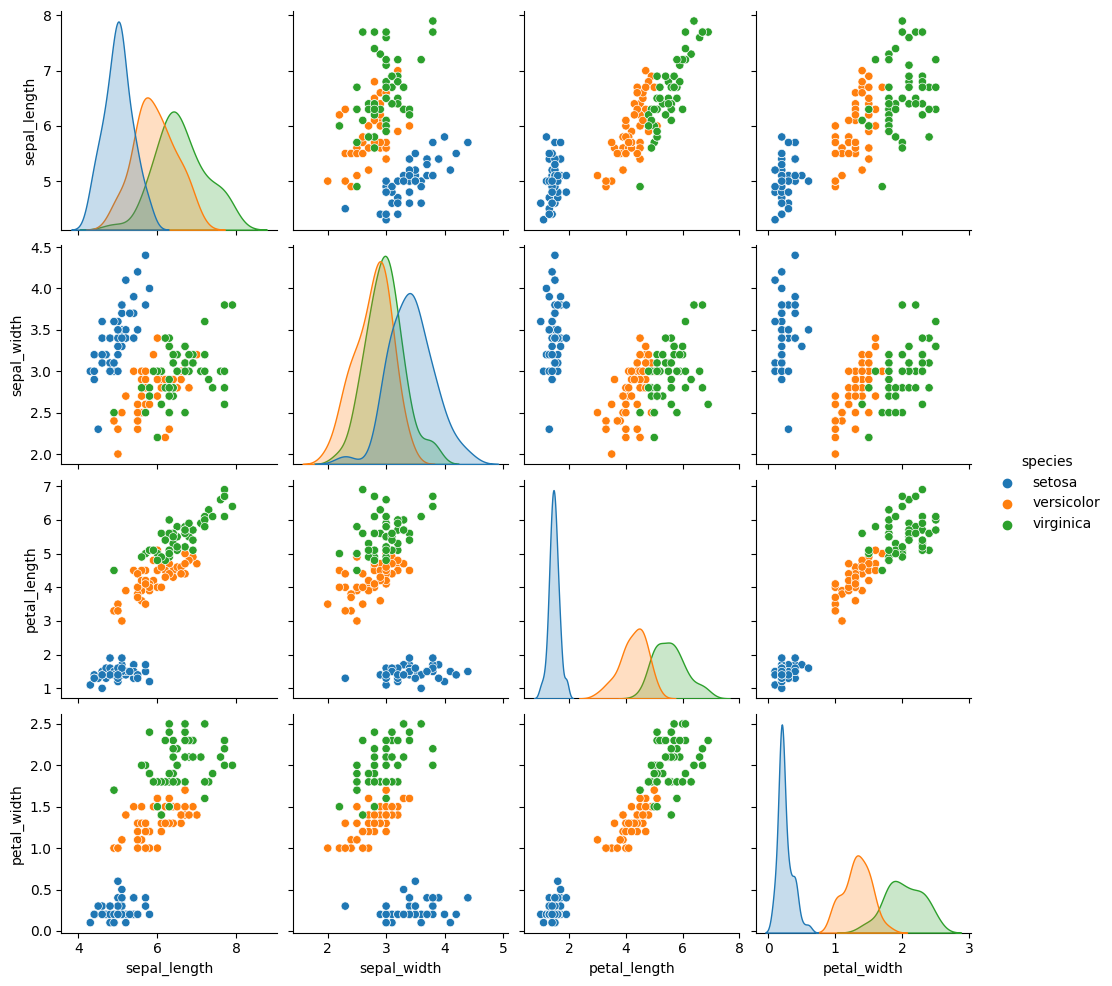

In [47]:
import seaborn as sns

sns.pairplot(iris, hue="species")
plt.show()

# hue: 카테고리 데이터

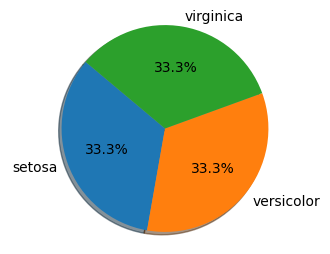

In [48]:
def piechart_iris(colName, dataset):
    plt.figure(figsize=(4, 3))
    labels = []
    sizes = []
    df = dataset.groupby(colName).size()
    
    for key in df.keys():
        labels.append(key)      # key = 3
        sizes.append(df[key])   # df[key] = 50
        
    plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)
    plt.axis("equal")
    plt.show()

piechart_iris("species", iris)

// 5. 학습<br>
// 5-1. 데이터셋 분리<br>

학습 이전까지 전처리 과정으로 볼 수 있다.

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:, :-1], iris.iloc[:, -1], test_size=0.33, random_state=42)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

     sepal_length  sepal_width  petal_length  petal_width
96            5.7          2.9           4.2          1.3
105           7.6          3.0           6.6          2.1
66            5.6          3.0           4.5          1.5
0             5.1          3.5           1.4          0.2
122           7.7          2.8           6.7          2.0
..            ...          ...           ...          ...
71            6.1          2.8           4.0          1.3
106           4.9          2.5           4.5          1.7
14            5.8          4.0           1.2          0.2
92            5.8          2.6           4.0          1.2
102           7.1          3.0           5.9          2.1

[100 rows x 4 columns]
     sepal_length  sepal_width  petal_length  petal_width
73            6.1          2.8           4.7          1.2
18            5.7          3.8           1.7          0.3
118           7.7          2.6           6.9          2.3
78            6.0          2.9           4.5    

// 5-2. 모델 선택

In [50]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                               min_weight_fraction_leaf=0.0, max_features=None, random_state=42, max_leaf_nodes=None, 
                              min_impurity_decrease=0.0, class_weight=None)

model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [51]:
model.score(X_test, y_test)

# 분류모델에서 스코어는 정확도!!!

0.98

## 모델 일반화 전략

### 1. K-겹 교차 검증(K-fold cross-validation)

데이터가 충분하지 않을 때 사용

In [64]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=10, shuffle=True, random_state=42)
results = cross_val_score(model, X_train, y_train, cv=cv)
fin_result = np.mean(results)

for i, _ in enumerate(results):
    print("{}번째 교차검증 정확도: {}".format(i+1, _))
    
print("교차검증 최종 정확도: {}".format(fin_result))

# KFold 하이퍼파라미터 검증할때 사용

1번째 교차검증 정확도: 0.9
2번째 교차검증 정확도: 1.0
3번째 교차검증 정확도: 0.8
4번째 교차검증 정확도: 1.0
5번째 교차검증 정확도: 0.8
6번째 교차검증 정확도: 0.9
7번째 교차검증 정확도: 1.0
8번째 교차검증 정확도: 0.9
9번째 교차검증 정확도: 1.0
10번째 교차검증 정확도: 1.0
교차검증 최종 정확도: 0.93


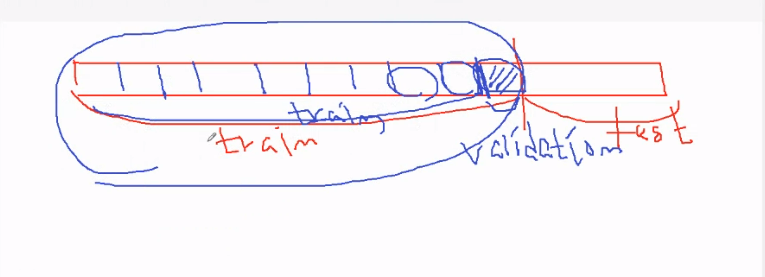

### 2. Learning Curve

데이터의 양이 충분한지 판단하기 위해 사용<br>
설치 : pip install scikit-plot

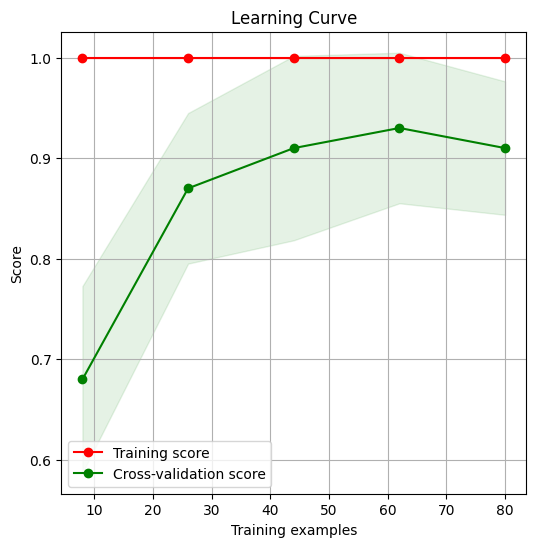

In [67]:
import scikitplot as skplt

model = DecisionTreeClassifier(
    criterion="gini",
    splitter="best",
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=42,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None
)

skplt.estimators.plot_learning_curve(model, X_train, y_train, figsize=(6, 6), cv=5)
plt.show()

# cv => 몇개로 분할할지 나타냄
# 100개의 학습데이터에서 교차검증으로 20%를 사용하였으므로 x축의 최대값은 80

### 3. 모델 최적화 전략을 위한 GridSearchCV를 이용한 하이퍼 파라미터 탐색✨

- 하이퍼 파라미터는 기계가 스스로 찾을 수 없어 사람이 직접 지정해야하는 파라미터
- GridSearchCV를 사용하면 하이퍼 파라미터 조합에 대한 경우의 수를 모두 격자(grid)에 나열하고 모든 조합을 일일히 학습 및 성능 측정하는 기능

---
### - GridSearchCV 파라미터

- estimator: 측정하고자 하는 모델로 classifier, regressor, pipeline이 사용될 수 있다.
- param_grid: 찾고자하는 파라미터. (dict 형식)
- n_jobs: 병렬 처리 개수 (-1은 전부) => 동시에 처리할 수 있는 개수, 컴퓨터 성능에 따라 다르기때문에 잘 모르면 -1을 사용해주면 된다. 
- cv: 교차검증을 위해 분할되는 폴드 수
- scoring: 예측 성능을 측정할 평가 방법. 보통 사이킷런에서 제공하는 문자열(예:'accuracy')을 넣지만 별도의 함수도 직접 지정이 가능
- refit: True면 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습시킨다. (default=True)
- verbose: log출력의 level을 조정 (숫자가 클수록 많은 log 출력)


In [68]:
from sklearn.model_selection import GridSearchCV

estimator = DecisionTreeClassifier()
cv = KFold(n_splits=10, random_state=42, shuffle=True)
parameters = {'max_depth': [4,5,6,10],
              'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3],
              'random_state': [7, 23, 42, 78],
              'min_impurity_decrease': [0.0, 0.05, 0.1, 0.2]
              }
model = GridSearchCV(estimator=estimator, param_grid=parameters, cv=cv, verbose=-1, n_jobs=-1, refit=True)
model.fit(X_train, y_train)

# 파라미터에 dict 객체로 전달

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 10],
                         'min_impurity_decrease': [0.0, 0.05, 0.1, 0.2],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3],
                         'random_state': [7, 23, 42, 78],
                         'splitter': ['best', 'random']},
             verbose=-1)

In [69]:
print("Best Estimator:\n", model.best_estimator_, "\n")
print("Best Params:\n", model.best_params_, "\n")
print("Best Score:\n", model.best_score_, "\n")

Best Estimator:
 DecisionTreeClassifier(max_depth=4, random_state=23, splitter='random') 

Best Params:
 {'criterion': 'gini', 'max_depth': 4, 'min_impurity_decrease': 0.0, 'min_weight_fraction_leaf': 0.0, 'random_state': 23, 'splitter': 'random'} 

Best Score:
 0.97 



## 평가지표 모델 평가

### 혼동 행렬 (Confusion Matrix)

In [70]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
confMatrix = confusion_matrix(y_test, pred)
print("Confusion Matrix: \n", confMatrix)

Confusion Matrix: 
 [[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


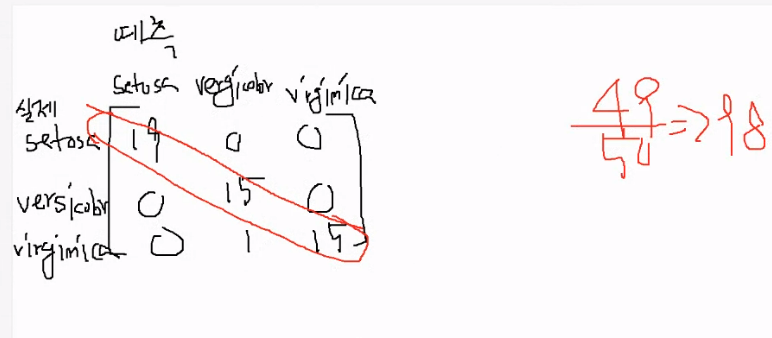

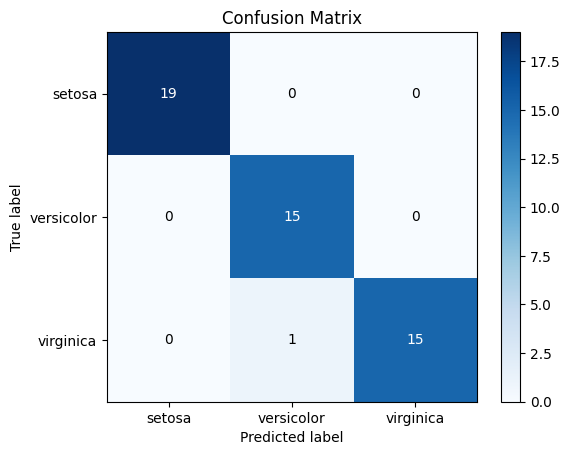

In [71]:
import scikitplot as skplt

pred = model.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, pred)
plt.show()

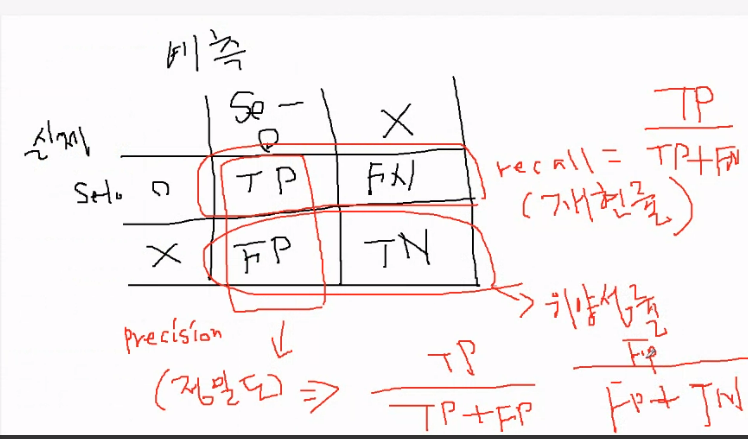

### 정밀도(precision)

In [75]:
# 집 함수 예시

Number = [1, 2, 3]
Name = ['mbc', 'kbs', 'sbs']

# for number_name in zip(Number, Name):
#     print(number_name)
    
# 똑같은 길이를 가진 데이터를 zip() 함수에 넣어주면 각 데이터를 순차적으로 튜플로 변환시켜준다.

for a, b in zip(Number, Name):
    print(a, b)
    
# a, b로 각각 넣어주면 unpacking 발생으로 각 각 대입해준다.
# 그러므로 zip()함수에 사용되는 배열의 길이는 같아야한다.

1 mbc
2 kbs
3 sbs


In [73]:
from sklearn.metrics import precision_score

precisions = precision_score(y_test, model.predict(X_test), average=None)

for target, score in zip(data.target_names, precisions):
    print(f"{target}의 정밀도: {score}")
    
# average=None: 다중분류일때 설정 (이진분류가 아닐때!)
# cf. 이진분류일때는 average=binary

setosa의 정밀도: 1.0
versicolor의 정밀도: 0.9375
virginica의 정밀도: 1.0


### 재현율(recall)

In [76]:
from sklearn.metrics import recall_score

recalls = recall_score(y_test, model.predict(X_test), average=None)

for target, score in zip(data.target_names, recalls):
    print(f"{target}의 재현율: {score}")

setosa의 재현율: 1.0
versicolor의 재현율: 1.0
virginica의 재현율: 0.9375


### f-score

In [79]:
from sklearn.metrics import fbeta_score, f1_score

fbetas = fbeta_score(y_test, model.predict(X_test), average=None, beta=2)
for target, score in zip(data.target_names, fbetas):
    print(f"{target}의 f-score: {score}")
    

print()
f1s = f1_score(y_test, model.predict(X_test), average=None)
for target, score in zip(data.target_names, f1s):
    print(f"{target}의 f1-score: {score}")


setosa의 f-score: 1.0
versicolor의 f-score: 0.9868421052631579
virginica의 f-score: 0.9493670886075949

setosa의 f1-score: 1.0
versicolor의 f1-score: 0.967741935483871
virginica의 f1-score: 0.967741935483871


### 혼동 행렬 예제

In [82]:
from sklearn.metrics import confusion_matrix

y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

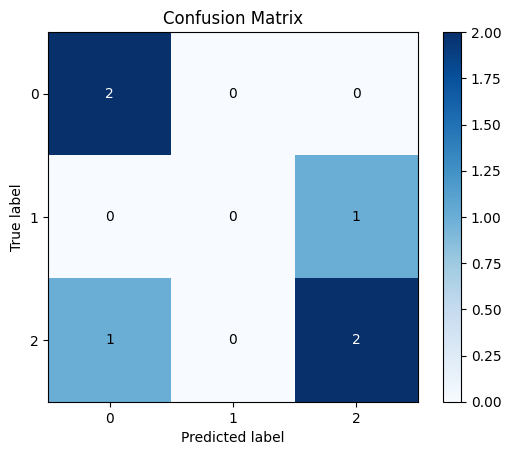

In [83]:
skplt.metrics.plot_confusion_matrix(y_true, y_pred)
plt.show()

In [87]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test), target_names=['setosa', 'versicolor', 'virginica']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### classification report

- 각각 클래스를 양성(positive) 클래스로 보았을때 정밀도, 재현율, F1점수를 각각 구하고 그 평균값으로 전체 모형의 성능을 평가
- support: 실제 타깃 클래스 개수
- macro: 단순 평균
- weighted: 각 클래스에 속하는 표본 개수로 가중 평균
- accuracy: 정확도

In [85]:
import sklearn.metrics as metrics

print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1
           2       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.44      0.56      0.49         6
weighted avg       0.56      0.67      0.60         6



C:\project\AI_Source\AI_01\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\project\AI_Source\AI_01\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\project\AI_Source\AI_01\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
print(metrics.classification_report(y_true, y_pred, target_names=['class 0', 'class 1', 'class 2']))

              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       0.00      0.00      0.00         1
     class 2       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.44      0.56      0.49         6
weighted avg       0.56      0.67      0.60         6



C:\project\AI_Source\AI_01\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\project\AI_Source\AI_01\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\project\AI_Source\AI_01\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
